#         ----------------------------- ADVANCED DESIGN PATTERNS -----------------------
#        ______Mediator

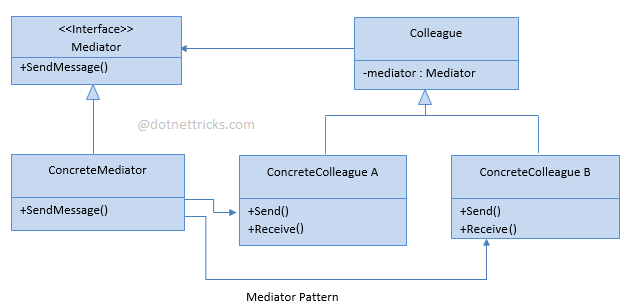

In [ ]:
import sys

class Colleague(object):
    def __init__(self, mediator, id):
        self._mediator = mediator
        self._id = id

    def getID(self):
        return self._id

    def send(self, msg):
        pass

    def receive(self, msg):
        pass

class ConcreteColleague(Colleague):
    def __init__(self, mediator, id):
        Colleague.__init__(self,mediator, id)

    def send(self, msg):
        print("Message '" + msg + "' sent by Colleague " + str(self._id))
        self._mediator.distribute(self, msg)

    def receive(self, msg):
        print("Message '" + msg + "' received by Colleague " + str(self._id))

In [2]:
class Mediator:
    def add(self, colleague):
        pass

    def distribute(self, sender, msg):
        pass

class ConcreteMediator(Mediator):
    def __init__(self):
        Mediator.__init__(self)
        self._colleague = []

    def add(self, colleague):
        self._colleague.append(colleague)

    def distribute(self, sender, msg):
        for colleague in self._colleague:
            if colleague.getID() != sender.getID():
                colleague.receive(msg)

In [5]:
def main():
    mediator = ConcreteMediator()

    c1 = ConcreteColleague(mediator, 1)
    c2 = ConcreteColleague(mediator, 2)
    c3 = ConcreteColleague(mediator, 3)

    mediator.add(c1)
    mediator.add(c2)
    mediator.add(c3)

    c3.send("Good Morning!")

if __name__ == "__main__":
    main()

Message 'Good Morning!' sent by Colleague 3
Message 'Good Morning!' received by Colleague 1
Message 'Good Morning!' received by Colleague 2


# __Momento

# 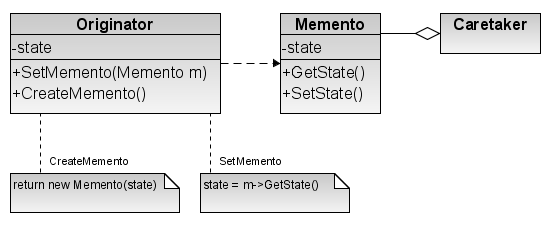

undo opertaions or RollBack operations in Databases


In [10]:
import pickle

class Originator:

    def __init__(self):
        self._state = "shankha"

    def create_memento(self):
        return pickle.dumps(vars(self))

    def set_memento(self, memento):
        previous_state = pickle.loads(memento)
        vars(self).clear
        vars(self).update(previous_state)

In [11]:
def main():
    originator = Originator()

    print(vars(originator))

    memento = originator.create_memento()

    originator._state = "blahhh"

    print(vars(originator))

    originator.set_memento(memento)

    print(vars(originator))

if __name__ == "__main__":
    main()

{'_state': 'shankha'}
{'_state': 'blahhh'}
{'_state': 'shankha'}


# __State

# 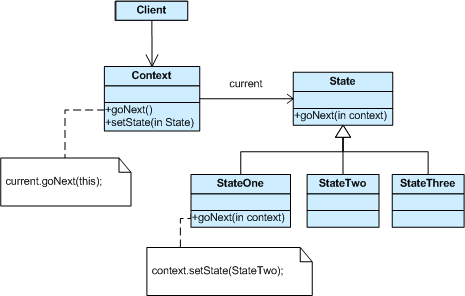

### 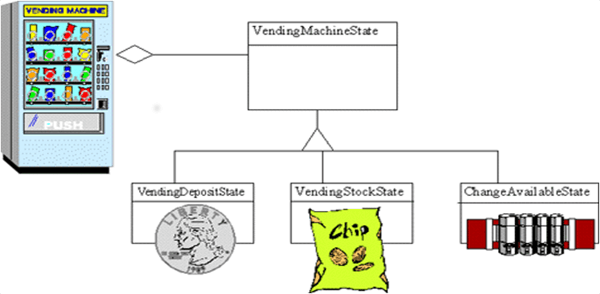

In [13]:
class AtmState():

    name = "state"
    allowed = []

    def goNext(self, state):
        if state.name in self.allowed:
            print("Current State: ", self, " switched to: ", state.name)
            self.__class__ = state

        else:
            print("Current State: ", self, " switching to: ", state.name, " not possible!")

    def __str__(self):
        return self.name

In [20]:
class Off(AtmState):

    name = "off"
    allowed = ['on']

class On(AtmState):

    name = "on"
    allowed = ['off','transact']
class Transact(AtmState):
    
    name = "transact"
    allowed = ['off']
class ATM():

    def __init__(self):
        self.current = Off()

    def setState(self, state):
        self.current.goNext(state)

def main():
    atm = ATM()

    atm.setState(On)
    atm.setState(Off)
    atm.setState(Transact)
    atm.setState(On)
    atm.setState(Transact)
    atm.setState(On)
    atm.setState(Off)

if __name__ == "__main__":
    main()

Current State:  off  switched to:  on
Current State:  on  switched to:  off
Current State:  off  switching to:  transact  not possible!
Current State:  off  switched to:  on
Current State:  on  switched to:  transact
Current State:  transact  switching to:  on  not possible!
Current State:  transact  switched to:  off


# __Template

# 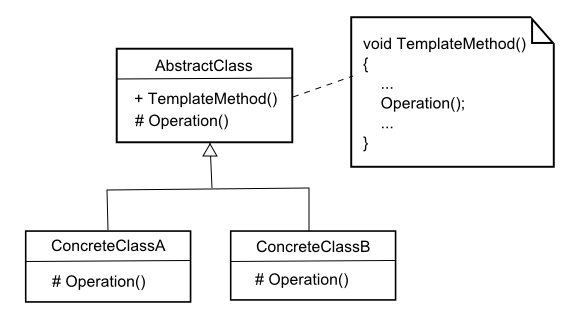

In [27]:
import sys

from abc import ABC, abstractmethod

class AbstractClass(ABC):
#This class inherit from Abstract Base Class to allow the use of the @abstractmethod decorator
    
    def template_method(self):
        """Ths is the template method that contains a collection of 
        methods to stay the same, to be overriden, and to be overriden optionally.
        """

        self.__always_do_this()
        self.do_step_1()
        self.do_step_2()
        self.do_this_or()

    def __always_do_this(self):
        #This is a protected method that should not be overriden.

        name = sys._getframe().f_code.co_name
        print('{}.{}'.format(self.__class__.__name__, name))

    @abstractmethod
    def do_step_1(self):
        #This method should be overriden
        pass

    @abstractmethod
    def do_step_2(self):
        #This method should be overriden
        pass

    def do_this_or(self):
        print('You can overide me but you do not have to')

In [28]:
class ConcreteClassA(AbstractClass):
#This class inherits from the Abstract class featuring the template method. 

    def do_step_1(self):
        print('Doing step 1 for ConcreteClassA ...')

    def do_step_2(self):
        print('Doing step 2 for ConcreteClassA ...')

class ConcreteClassB(AbstractClass):
#This class inherits from the Abstract class featuring the template method.

    def do_step_1(self):
        print('Doing step 1 for ConcreteClassB ...')

    def do_step_2(self):
        print('Doing step 2 for ConcreteClassB ...')

    def do_this_or(self):
        print('Doing my own business ...')

In [29]:
def main():
    print('==ConcreteClassA==')
    a = ConcreteClassA()
    a.template_method()

    print('==ConcreteClassB==')
    b = ConcreteClassB()
    b.template_method()

if __name__ == '__main__':
    main()

==ConcreteClassA==
ConcreteClassA.__always_do_this
Doing step 1 for ConcreteClassA ...
Doing step 2 for ConcreteClassA ...
You can overide me but you do not have to
==ConcreteClassB==
ConcreteClassB.__always_do_this
Doing step 1 for ConcreteClassB ...
Doing step 2 for ConcreteClassB ...
Doing my own business ...
